In [35]:
from pycesam import *
from pycesam.gui import *
import astropy.units as u
from astropy.constants import R_jup, R_sun, mu0, M_sun, G
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
from ipywidgets import interact

In [36]:
mdl = CModel('1MJ_R')
mdl_plot = CModelGUI('1MJ_R')

Reading 1MJ_R.don...[Done]
Reading 1MJ_R.run...[Done]
Reading 1MJ_R.frun...[Done]


Reading *1MJ_R*.osc files:   0%|          | 0/108 [00:00<?, ?it/s]

Reading 1MJ_R.HRnew...[Done]
Reading 1MJ_R.don...[Done]
Reading 1MJ_R.run...[Done]
Reading 1MJ_R.frun...[Done]


Reading *1MJ_R*.osc files:   0%|          | 0/108 [00:00<?, ?it/s]

Reading 1MJ_R.HRnew...[Done]


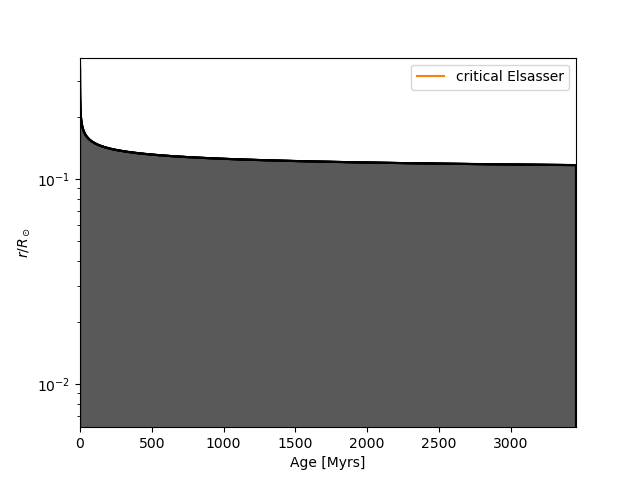

In [37]:
mdl_plot.plot_cz(r_or_m='r')
plt.show()

In [4]:
end = len(mdl.glob)-1
Omega = mdl.params.w_rot*1e3
R_tot = mdl.var[end][0][0]/1e2
print(f"total radius of planet = {R_tot/(R_jup.value)} Rjup")
print(f"total mass of planet = {mdl.params.mtot} Msun")
print(f"total angular velocity of planet = {Omega/1e3} km/s")

total radius of planet = 1.1382211674285234 Rjup
total mass of planet = 0.001 Msun
total angular velocity of planet = 5.0 km/s


In [5]:
Omega_array = mdl.var[end][15] # rad/s

In [6]:
len(Omega_array)

433

/Users/paulvuattier/Desktop/cesam2k20/python3/pycesam/__init__.py:3998: RuntimeWarning: invalid value encountered in divide
  self.Frad = krad*te*grad/hp


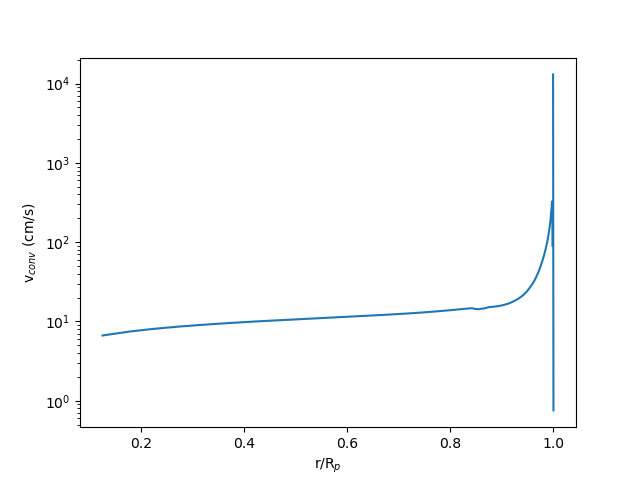

In [7]:
mdl.calc_vconv('osc', i=end)

r = ((mdl.var[end][0])/(R_tot*1e2))
  
plt.figure()
plt.plot(r, mdl.vconv)
    
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'v$_{conv}$ (cm/s)')
plt.yscale('log')
plt.show()

In [8]:
mask = np.where(~np.isnan(mdl.vconv))

In [9]:
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Ro_over_time(i=end):
    
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    mdl.calc_vconv('osc', i=i)
    Ro = mdl.vconv/(mdl.lmix*mdl.var[i][15]) #vconv/lmix * Omega
        
        
    age = mdl.glob[i][10]
    plt.figure()
    #print(len(r),len(Ro),len(mdl.vconv),len(mdl.lmix))
    plt.plot(r, Ro)
    plt.plot(r, 0.12*np.ones(len(Ro)), label=r'critical R$_o$')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'Ro')
    plt.yscale('log')
    plt.title(f'At t = {age/1e3} Gyr')
    plt.show()

interactive(children=(IntSlider(value=107, description='i', max=107), Output()), _dom_classes=('widget-interac…

In [47]:
type(index)

tuple

In [50]:
r[index]

array([0.84157554])

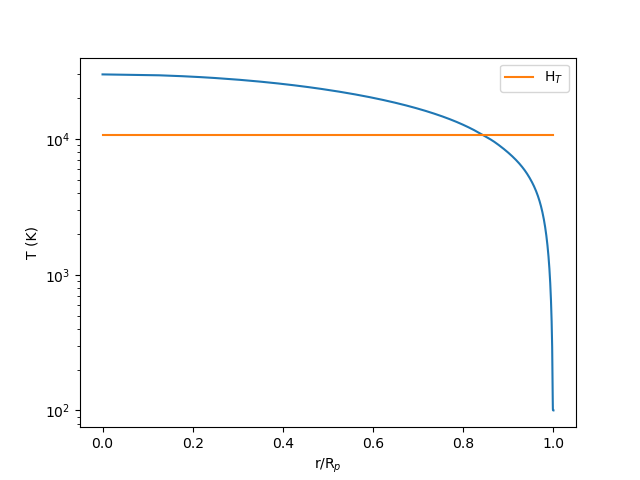

In [45]:
T = mdl.var[end][2]
index = np.where(np.abs(T - T[-1]/2.78) < 100)
plt.figure()
plt.plot(r, T)
plt.plot(r, (T[-1]/2.78)*np.ones(len(r)), label=r'H$_T$')
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'T (K)')
plt.yscale('log')
plt.legend()
plt.show()

H_T_obs = r[index]*R_tot*1e2

In [11]:
@interact(i=(0, len(mdl.var), 1)) 
def plot_pressure_over_time(i=end):
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    age = mdl.glob[i][10]
    plt.figure()
    plt.plot(r, mdl.var[i][3]*1e-12)
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'P (Mbar)')
    plt.yscale('log')
    plt.title(f'At t = {age/1e3} Gyr')
    plt.show()

interactive(children=(IntSlider(value=107, description='i', max=108), Output()), _dom_classes=('widget-interac…

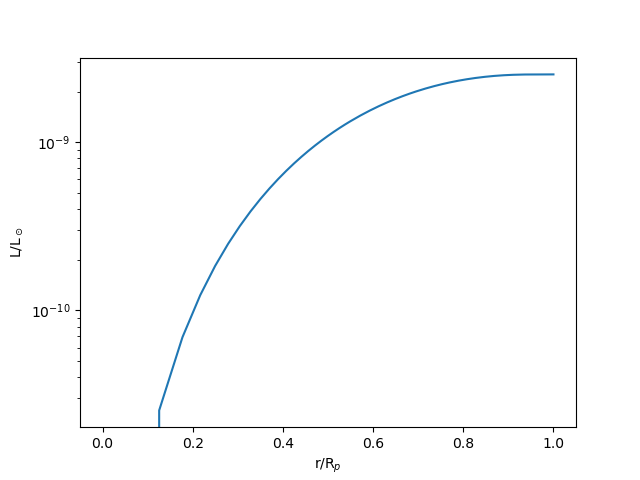

In [12]:
L = mdl.var[end][6]
L_sun = mdl.glob[end][16]

plt.figure()
plt.plot(r, L/L_sun)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'L/L$_\odot$')
plt.yscale('log')
plt.show()

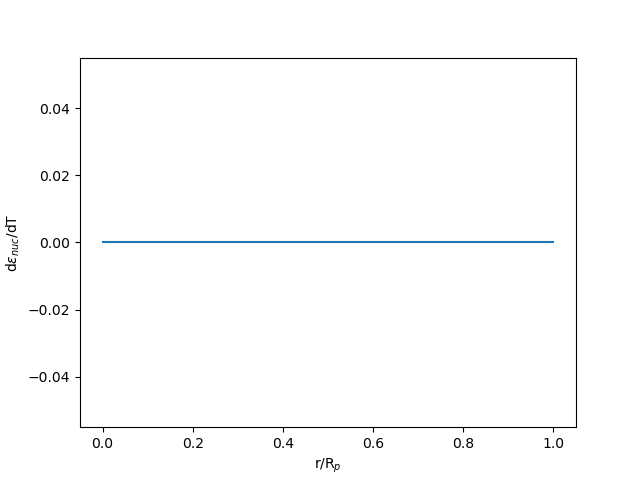

In [13]:
denuc_dT = mdl.var[end][18]

plt.figure()
plt.plot(r, denuc_dT)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'd$\epsilon_{nuc}$/dT')
#plt.yscale('log')
plt.show()

In [53]:
print(mdl.var[0][2])

[  734.36580161   734.37781739   734.39612136   734.42423804
   734.46772063   734.53529808   734.64062517   734.804901
   735.06068722   735.45728867   736.0679925    736.99918591
   738.40072724   740.47574559   743.48620255   747.74831852
   753.6103136    761.40571854   771.38096098   783.60650422
   797.89280731   813.73820695   830.32949526   846.59963743
   861.3304644    873.28012838   883.59872602   894.2050976
   905.07289347   916.17531142   927.48542305   938.97646814
   950.62211479   962.39668487   974.27534515   986.23426608
   998.25075029  1010.26285208  1022.16641687  1033.92379298
  1045.51895688  1056.94588172  1068.19992211  1079.27474168
  1090.16176487  1100.85253122  1111.34211806  1121.62898664
  1131.71447846  1141.60276602  1151.30076325  1160.81742672
  1170.16219525  1179.34230764  1188.36232634  1197.22512586
  1205.93303788  1214.48953112  1222.90019563  1231.17253751
  1239.31563761  1247.33973312  1255.25536491  1263.07274546
  1270.80160657  1278.45121

In [51]:
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Rm_over_time(i=end):

    c = 3*10**10
    eta = c**2/(4*np.pi*10**7*mdl.var[i][2]**(3/2)) #eta = c^2/(4*pi*10^7*T^3/2)
    mdl.calc_vconv('osc', i=i)
    Rm = mdl.vconv*mdl.lmix/eta
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    
    
    age = mdl.glob[i][10]
    plt.figure()
    #print(len(r),len(Rm),len(eta))
    plt.plot(r, Rm)
    plt.plot(r, 50*np.ones(len(Rm)), label=r'critical R$_m$')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'R$_m$')
    plt.yscale('log')
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=107, description='i', max=107), Output()), _dom_classes=('widget-interac…

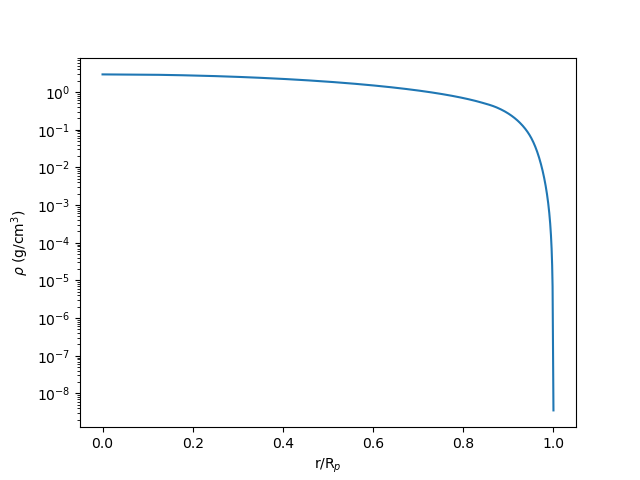

In [15]:
rho = mdl.var[end][4]

plt.figure()
plt.plot(r, rho)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'$\rho$ (g/cm$^3$)')
plt.yscale('log')
plt.show()

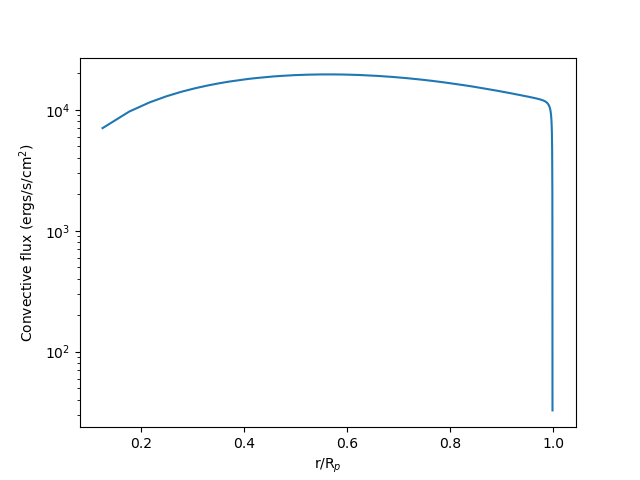

In [16]:
plt.figure()
plt.plot(r, mdl.Fconv)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Convective flux (ergs/s/cm$^2$)')
plt.yscale('log')
plt.show()

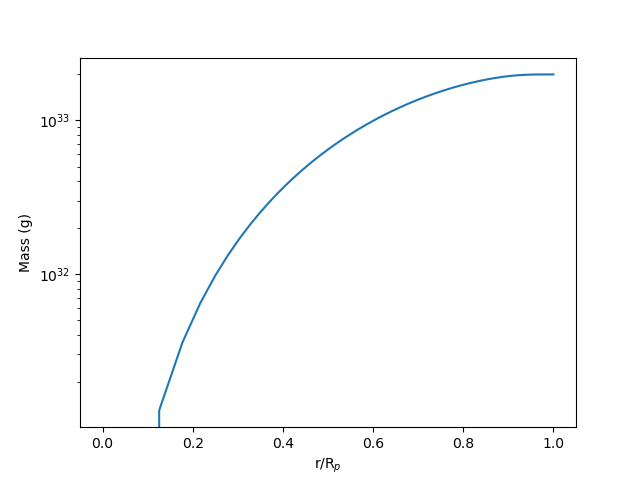

In [17]:
plt.figure()
plt.plot(r, mdl.var[end][1]*M_sun.value*1e3)
plt.xlabel(r'r/R$_p$')
plt.ylabel(r'Mass (g)')
plt.yscale('log')
plt.show()

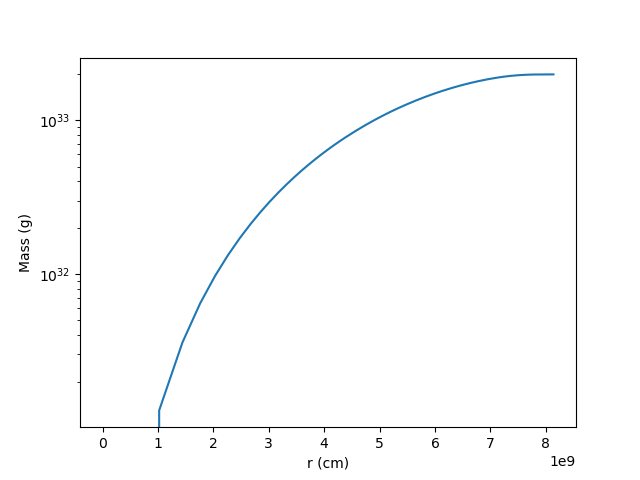

In [18]:
plt.figure()
plt.plot(mdl.var[end][0], mdl.var[end][1]*M_sun.value*1e3)
plt.xlabel(r'r (cm)')
plt.ylabel(r'Mass (g)')
plt.yscale('log')
plt.show()

In [21]:
c = 0.68
f_ohm = 1
rho_avg = np.mean(rho[mask])
qc_0 = mdl.Fconv[mask][-1]
P = mdl.var[end][3][mask]
dr = mdl.var[end][0][mask]
mask_2 = np.where(mdl.Fconv[mask] > 0)
V = (4/3)*np.pi*(R_tot*1e2)**3
dF = (mdl.Fconv[mask][mask_2]*mdl.lmix[mask][mask_2]/(qc_0*H_T_obs))**(2/3)*(rho[mask][mask_2]/rho_avg)**(1/3)*4*np.pi*dr[mask_2]**2
mask_3 = np.where(dF > 0)
#F = np.trapezoid(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V 
F = np.trapz(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V #trapz ou trapezoid dépend de la version de numpy
print(F)


0.9925707930941089


In [22]:
B = np.sqrt(c*F*rho_avg**(1/3)*qc_0**(2/3))
print(f"Generated magnetic field strength = {B} Gauss")

Generated magnetic field strength = 12.69428172387942 Gauss


In [33]:
@interact(i=(0, len(mdl.var)-1, 1)) 
def plot_Elsasser_over_time(i=end):

    
    T = mdl.var[i][2]
    sigma = 10**7*T**(3/2)
    rho = mdl.var[i][4]
    mdl.calc_vconv('osc', i=i)
    mask = np.where(~np.isnan(mdl.vconv))
    rho_avg = np.mean(rho[mask])
    qc_0 = mdl.Fconv[mask][-1]
    dr = mdl.var[i][0][mask]
    mask_2 = np.where(mdl.Fconv[mask] > 0)
    R_tot = mdl.var[i][0][0]
    r = ((mdl.var[i][0])/(R_tot))
    index = np.where(np.abs(T - T[-1]/2.78) < 100)
    H_T_obs = (r[index]*R_tot)[0]
    print(f"H_T_obs =  {H_T_obs}")

    
    V = (4/3)*np.pi*(R_tot)**3
    dF = (mdl.Fconv[mask][mask_2]*mdl.lmix[mask][mask_2]/(qc_0*H_T_obs))**(2/3)*(rho[mask][mask_2]/rho_avg)**(1/3)*4*np.pi*dr[mask_2]**2
    mask_3 = np.where(dF > 0)
    #F = np.trapezoid(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V 
    F= np.trapz(dF[mask_3][::-1], dr[mask_2][mask_3][::-1]) / V
    print(f"F = {F}")


    
    
    B = np.sqrt(c*F*rho_avg**(1/3)*qc_0**(2/3))
    Omega = mdl.var[i][15]
    Elsasser = sigma*B**2/(rho*Omega)
    
    print(f"Generated B = {B} Gauss")
    
    plt.figure()
    plt.plot(r, Elsasser)
    plt.plot(r, 1*np.ones(len(Elsasser)), label=r'critical Elsasser')
    plt.xlabel(r'r/R$_p$')
    plt.ylabel(r'Elsasser nb')
    plt.yscale('log')
    plt.legend()
    plt.show()


interactive(children=(IntSlider(value=107, description='i', max=107), Output()), _dom_classes=('widget-interac…